# Business Analytics Community Think Tank Exercise:
## Natural Language Processing with Word2vec

### About me:
Sarah Thompson    
Covington, Louisiana -> Missoula, Montana   
Bridge Partners: January 2020  
Masters in Business Analytics @ University of Montana  

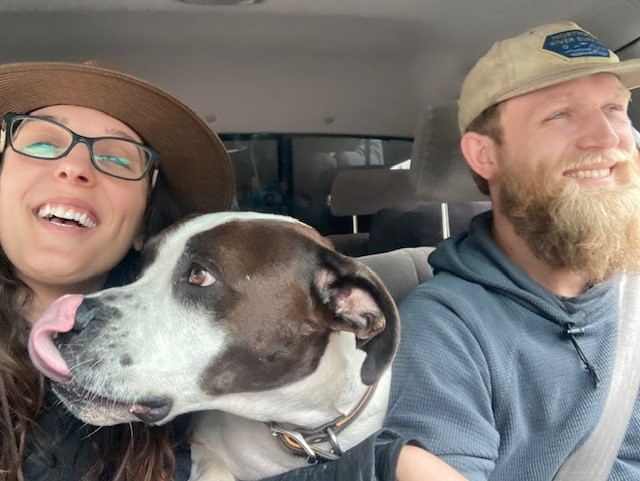

### This is jupyter notebook! Welcome if you're new.  
 
Here are some useful links to download it:  
* https://docs.anaconda.com/anaconda/install/index.html  
* https://test-jupyter.readthedocs.io/en/latest/install.html  

You can download this notebook/clone the repository here:  
* https://github.com/sthompsonBP/NLPw2v

Want to learn more about github? Watch GitHub for Poets:  
* https://www.youtube.com/watch?v=BCQHnlnPusY

### Purpose of this Presentation
* Explain a little about natural language processing and (some) useful tools.  
    * jupyter notebook
    * github
    * nltk library
    * word2vec
    * k-means clustering
  
* Apply those tools to democratic presidential debate data
    * see data in new and exciting ways!

## Natural Language Processing (NLP)

"Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data." -Wikipedia

### NLTK Library

https://www.nltk.org/

In [1]:
#  Import the nltk
import nltk
# Import 9 sample books
from nltk.book import *
import pandas as pd

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# Look at the first 10 things in text1
text1[1:11]

['Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(']

### Tokenization
Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.
For example, the text “It is raining” can be tokenized into ‘It’, ‘is’, ‘raining’
-Towardsdatascience

In [3]:
text = "This is some text"

In [4]:
text

'This is some text'

In [5]:
# One way to tokenize text that is split on spaces
tokenized_text = text.split(" ")

In [6]:
tokenized_text

['This', 'is', 'some', 'text']

In [7]:
# Another way is to download the word_tokenize function
from nltk.tokenize import word_tokenize

In [8]:
tokenized_text_2 = word_tokenize(text)

In [9]:
# Same result as tokenized_text!
tokenized_text_2

['This', 'is', 'some', 'text']

### Lexical Diversity


The average number of times a token is used

In [10]:
# If we wanted to see the average number of times a token is used, across all tokens, we can do this: 
print("The lexical diversity of {} is {}".format(text1.name,round(len(text1)/len(set(text1)),2)))

The lexical diversity of Moby Dick by Herman Melville 1851 is 13.5


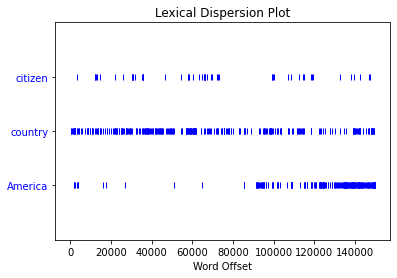

In [11]:
# And we can make super cool dispersion plots
words = ["citizen","country","America"]

text4.dispersion_plot(words)

### Counting

In [12]:
# If we wanted to see how often a word was used, we just do:
print(text6.count("ARTHUR"))

225


### Most common tokens

In [13]:
# We can look at the most common words
fd = FreqDist(text6) # This returns a Counter object, a dictionary that's optimized for counting 
# The 20 most common words in the text are:    
fd.most_common(20)

[(':', 1197),
 ('.', 816),
 ('!', 801),
 (',', 731),
 ("'", 421),
 ('[', 319),
 (']', 312),
 ('the', 299),
 ('I', 255),
 ('ARTHUR', 225),
 ('?', 207),
 ('you', 204),
 ('a', 188),
 ('of', 158),
 ('--', 148),
 ('to', 144),
 ('s', 141),
 ('and', 135),
 ('#', 127),
 ('...', 118)]

### Stop words



"In computing, stop words are words which are filtered out before or after processing of natural language data (text).[1] Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search." - Wikipedia

In [14]:
# nltk gives us a nice set of stopwords 
sw = nltk.corpus.stopwords.words("english")

In [15]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# We can easly remove stop words from monty python like this
monty_nsw = [word for word in text6 if word.lower() not in sw]

In [17]:
# Might as well remove any tokens that are not words
monty_clean = [word for word in monty_nsw if word.isalpha()]

In [18]:
# Now the most common words make a bit more sense! YAY for clean data
fd = FreqDist(monty_clean)
    
fd.most_common(20)

[('ARTHUR', 225),
 ('Oh', 110),
 ('LAUNCELOT', 76),
 ('GALAHAD', 69),
 ('KNIGHT', 68),
 ('FATHER', 63),
 ('BEDEVERE', 61),
 ('Well', 54),
 ('HEAD', 54),
 ('GUARD', 53),
 ('Sir', 52),
 ('VILLAGER', 47),
 ('Ni', 47),
 ('boom', 45),
 ('Yes', 42),
 ('ha', 42),
 ('clop', 39),
 ('ROBIN', 39),
 ('away', 38),
 ('witch', 37)]

## ~ A project I did one time~

### UMT MSBA - can I watch the debates without watching the debates?
* Scraped all the transcripts of the Democratic presidential debates  
* Stored the data in a database, parsed by speaker statement  
* Tokenized it  
* Removed some speakers
  
#### We are going to look at this text!
* Run some basic descriptives

#### Talk about a cool alogorithm (word2vec)
* Apply that algorithm to the democratic debate data
* Look at candidate positioning on topics we care about
* Try really hard not to talk about anything political!

#### Talk about K-means clustering
* Grouping candidates based on their positioning on certain topics
* Using pca to visualize our groups in 2 dimensions


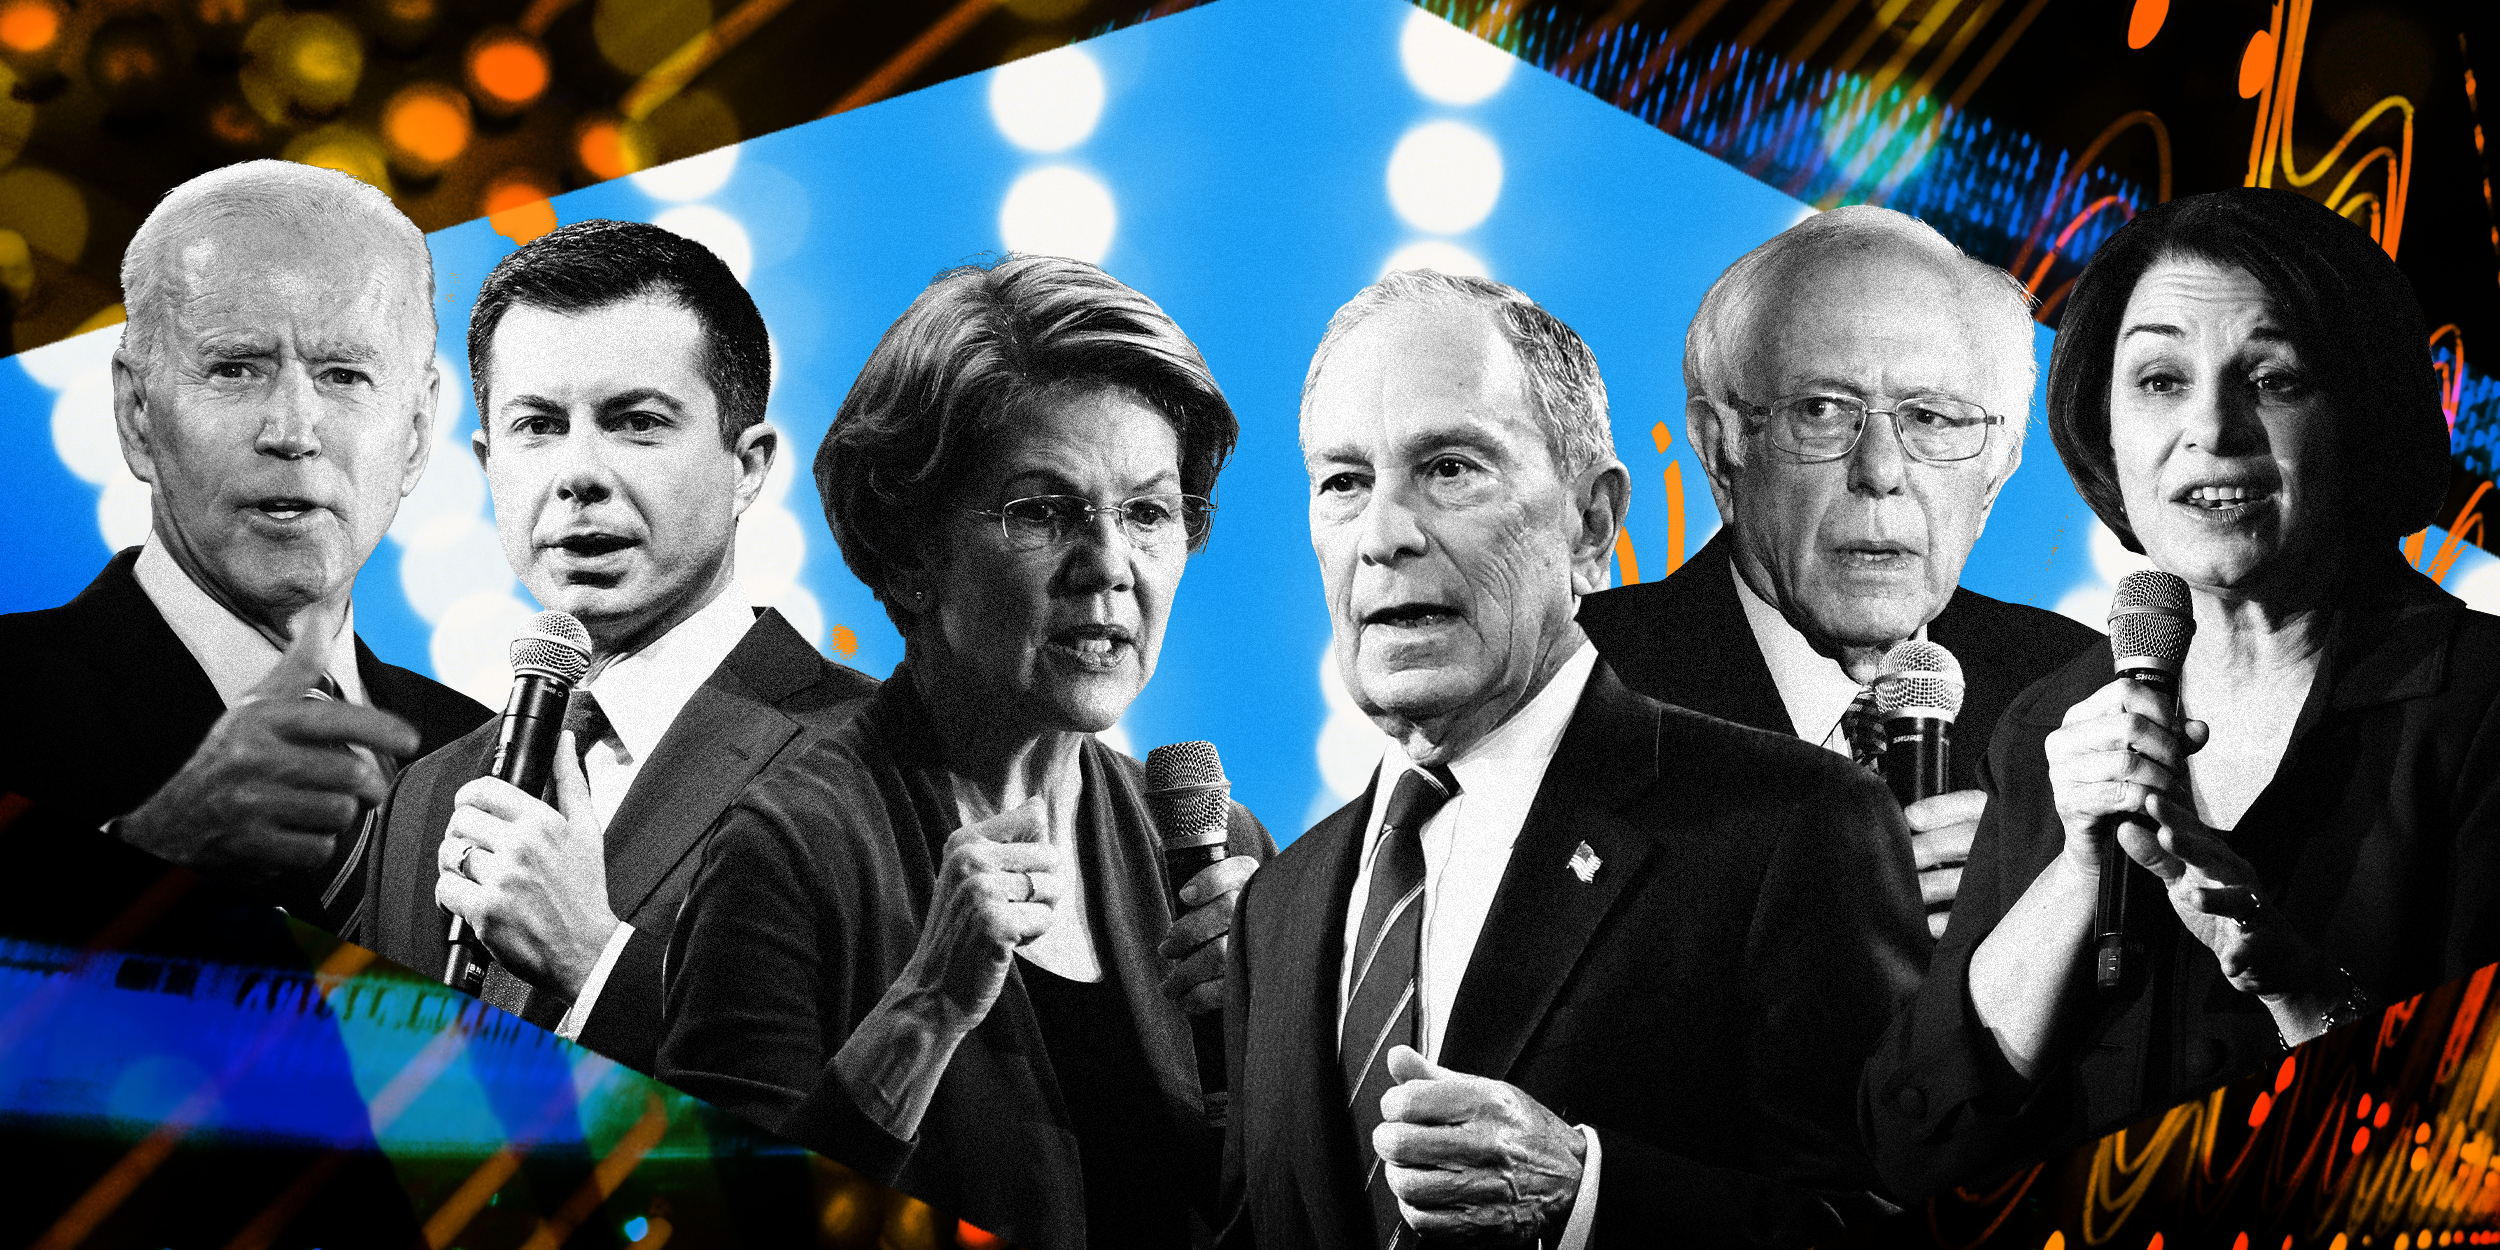

In [19]:
# The data is stored in a dictionary in a .npy file
import numpy as np

# Load
candidate_dictionary = np.load('words_speaker.npy',allow_pickle='TRUE').item()

# Print the keys of the dictionary
print([key for key in candidate_dictionary.keys()]) # displays the candidates avialable

['WARREN', 'KLOBUCHAR', 'BOOKER', 'CASTRO', 'GABBARD', 'INSLEE', 'SANDERS', 'BENNET', 'BIDEN', 'HARRIS', 'BUTTIGIEG', 'YANG']


#### Dictionary: 
Dictionary in Python is an ordered collection of data values, used to store data values like a map, which, unlike other Data Types that hold only a single value as an element, Dictionary holds key:value pair. Key-value is provided in the dictionary to make it more optimized. -geeksforgeeks.org

In [20]:
set(candidate_dictionary['WARREN'])

{'gotten',
 'version',
 'joes',
 'madeup',
 'bankruptcy',
 'taking',
 'play',
 'decided',
 'funny',
 'spending',
 'trouble',
 'terms',
 'controls',
 'title',
 'worries',
 'honor',
 'sister',
 'use',
 'sell',
 'small',
 'suicide',
 'underneath',
 'disagree',
 'wall',
 'machine',
 'swamp',
 'economic',
 'chance',
 'ambassador',
 'blaming',
 'trying',
 'turns',
 'figure',
 'canadian',
 'throughout',
 'orders',
 'fortune',
 'wrote',
 'negotiation',
 'something',
 'been',
 'grade',
 'promise',
 'approach',
 'whenever',
 'buying',
 'will',
 'manufacture',
 'playgrounds',
 'permitted',
 'offering',
 'increase',
 'insert',
 'until',
 'sheslow',
 'substitute',
 'visas',
 'danger',
 'went',
 'same',
 'fields',
 'a',
 'itshave',
 'itself',
 'thinktanks',
 'basically',
 'showing',
 'morning',
 'industry',
 'daddies',
 'get',
 'decisions',
 'further',
 'where',
 'gdp',
 'pacs',
 'experts',
 'bryon',
 'most',
 'want',
 'about',
 'toward',
 'later',
 'v',
 'modest',
 'midwest',
 'provides',
 'jan',
 

### Who do you want?

In [21]:
# The people in this list will be used in further analysis
cur_candidates = ['BIDEN','SANDERS','WARREN','HARRIS','BOOKER','KLOBUCHAR','YANG']

In [22]:
#Make a dictionary of current candidates called cur_can
cur_can = {}
for speaker in candidate_dictionary :
    if speaker in cur_candidates:
        cur_can[speaker] = candidate_dictionary[speaker]

In [23]:
# Print out a little information about each canddiate
# ***************************************INCLUDES STOPWORDS**********************************************************
#look at the most common words for each candidate
for candidate in cur_can.keys():
    print('{}:'.format(candidate))
    print("Lexical diversity: {}".format(round(len(cur_can[candidate])/len(set(cur_can[candidate])),2)))
    print("Number of spoken words: {}".format(len(cur_can[candidate])))
    print()

WARREN:
Lexical diversity: 105.52
Number of spoken words: 251870

KLOBUCHAR:
Lexical diversity: 93.39
Number of spoken words: 230680

BOOKER:
Lexical diversity: 60.61
Number of spoken words: 116730

SANDERS:
Lexical diversity: 95.54
Number of spoken words: 216870

BIDEN:
Lexical diversity: 101.02
Number of spoken words: 278920

HARRIS:
Lexical diversity: 68.11
Number of spoken words: 119390

YANG:
Lexical diversity: 57.62
Number of spoken words: 101470



In [24]:
# We can easily remove stop words
for speaker in cur_can:
    cur_can[speaker] = [word for word in cur_can[speaker] if word not in sw]

In [25]:
#Creates a dictionary of most common words for each candidate
most_common_words = {}
#look at the most common words for each candidate
for candidate in cur_can.keys():
    text = cur_can[candidate] #string of words
    fd = FreqDist(text)
    most_common_holder = fd.most_common(50)
    most_common_words[candidate] = most_common_holder
    print('{}:'.format(candidate))
    print()
    for elem in most_common_holder[:10]:
        print(elem[0])
    print()

WARREN:

people
need
get
going
want
make
america
country
one
every

KLOBUCHAR:

think
people
president
going
would
one
get
want
dont
make

BOOKER:

people
president
country
going
im
need
right
one
us
like

SANDERS:

people
country
got
going
right
care
health
well
think
us

BIDEN:

fact
going
thats
people
get
would
one
president
make
im

HARRIS:

people
states
president
justice
going
america
need
united
plan
us

YANG:

would
people
american
country
right
know
going
us
need
way



In [26]:
#Makes a dictionary of the most common words without the number of times used
most_common_no_num = {}
for candidate in most_common_words:
    most_common = most_common_words[candidate]
    most_common_no_num_list = [tup[0] for tup in most_common]
    most_common_no_num[candidate] = most_common_no_num_list
    
#Create a dictionary of most common words unique to each candidate
candidate_unique = {}
for candidate in most_common_no_num :
    candidate_words = [word for word in most_common_no_num[candidate]]
    new_words = candidate_words
    for o_candidate in most_common_no_num :
        if candidate == o_candidate :
            continue
        else :
            o_candidate_words = [word for word in most_common_no_num[o_candidate]]
            new_words = [word for word in new_words if word not in o_candidate_words]
    candidate_unique[candidate] = new_words
#Print out words in easy copy/paste format
for candidate in candidate_unique:
    print(candidate,'\n')
    for word in candidate_unique[candidate] :
        print(word)
    print()

WARREN 

big
pay
cant
understand
means
great
giant
weve
democrats

KLOBUCHAR 

bring
bill
someone
state
better
win
comes

BOOKER 

nation
stage
common
city
rights
community
criminal
even

SANDERS 

industry
million
year
medicare
let
joe
war
end
major
campaign
youre

BIDEN 

able
number
making
theres
two
come
made

HARRIS 

justice
women
black
children
agree
act
department
today
also

YANG 

around
jobs
new
home
economy
kids
start
much
problems
month
immigrants
hands



## Word2vec algorithm

#### Algorithm
"A problem-solving methodology" - Zac MacAdam  
a process or set of rules to be followed in calculations or other problem-solving operations, especially by a computer.-Oxford Dictionary

#### Word Embeddings
A word’s embedding is its representation as a vector in multidimensional space that can be used as a means for comparison. 

Word2vec is a popular algorithm for generating word embeddings; it uses a neural network to compress words into a vector of 300 dimensions. The neural network learns on a corpus of text and uses one of two methods, continuous bag of words or Skip-gram, for predicting the desired word in a sequence. Once the model is trained, each row of its weight matrix contains a compressed, lower dimensional representation of a word it was trained on. This compressed representation is known as the word’s embedding and the embedding is also a vector in 300- dimensional space.  
  
"Training the algorithm gives you a formula and then you can pass a word into the trained algorithm and the formula will generate the word's position in space." - Megan Finley

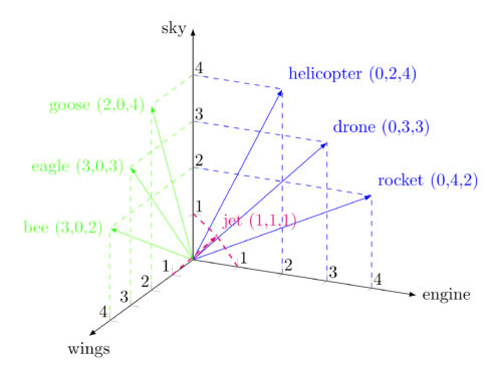  image from https://corpling.hypotheses.org/495

#### Types of pretrained models:

Google News model: https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-models  
  
"We are publishing pre-trained vectors trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases."

In [27]:
#Importing google news word embeddings, this may take a few mins
import gensim
model_ = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz',binary=True)

C:\Users\Bridge Partners\miniconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


#### King - man + woman = ?

In [28]:
model_.most_similar(positive=['king','woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]


## Word2vec + our data
* We can select vectors that represent topics of interest
* Generate the average vector for each candidate
* Calculate the distance between the the topic of interest and the average vector for each candidate
* Map the candidates' distance from each topic of interest in relationship to each other

REMINDER: Position in space = word embeddings = vector - Megan Finley

### 1. Find our vectors of interest

In [29]:
# Pick a topic for each word to be compared to the candidates' text
word1='immigration' 
word2='health_care'
word3='taxes'
word4='business'

In [46]:
# Examine the nearest vectors to ensure we are capturing what we want to capture
print(word1)
model_.most_similar(positive=[word1])

immigration


[('Immigration', 0.7575443387031555),
 ('illegal_immigration', 0.7396935224533081),
 ('immigrations', 0.7351098656654358),
 ('illegal_immigrants', 0.6616328358650208),
 ('immigation', 0.6604097485542297),
 ('immigrants', 0.6578113436698914),
 ('illegal_immigrant', 0.6361724734306335),
 ('immigration_reform', 0.6335226893424988),
 ('illegal_alien', 0.6089527010917664),
 ('deportations', 0.6071246862411499)]

In [31]:
print(word2)
model_.most_similar(positive=[word2])

[('heath_care', 0.8565884828567505),
 ('healthcare', 0.8118599653244019),
 ('heathcare', 0.6895116567611694),
 ('repealers_already', 0.6846678853034973),
 ('Medicare', 0.6456743478775024),
 ('medicare', 0.6424735188484192),
 ('single_payer', 0.6247864961624146),
 ('setting_Koffenberger', 0.6237829327583313),
 ('Elective_abortions', 0.6234456300735474),
 ('heatlh_care', 0.6198207139968872)]

In [32]:
print(word3)
model_.most_similar(positive=[word3])

[('tax', 0.8404221534729004),
 ('Taxes', 0.7420234680175781),
 ('excise_taxes', 0.6844214200973511),
 ('taxation', 0.6653638482093811),
 ('levies', 0.6444125771522522),
 ('excise_tax', 0.6315878629684448),
 ('surtaxes', 0.6314313411712646),
 ('Tax', 0.6290186643600464),
 ('wealthiest_Minnesotans', 0.6080849766731262),
 ('surtax', 0.6049051880836487)]

In [33]:
print(word4)
model_.most_similar(positive=[word4])

[('businesses', 0.6623775362968445),
 ('busines', 0.6080313324928284),
 ('busi_ness', 0.5612965226173401),
 ('PETER_PASSI_covers', 0.5530025959014893),
 ('Business', 0.546613872051239),
 ('businesss', 0.5441080331802368),
 ('Sopris_supplemental_solutions', 0.5252544283866882),
 ('company', 0.5192003846168518),
 ('entrepreneurial', 0.5077816247940063),
 ('buiness', 0.5039401650428772)]

### Generate average vector for each candidate

In [34]:
#Getting word embeddings for all speakers 
emb_spkr = {}
for speaker in cur_can:
    emb_wrds = []
    for wrd in cur_can[speaker]:
        try:
            emb_wrds.append(model_[wrd])
        except:
            pass
    emb_spkr[speaker] = emb_wrds

#Getting the average word embeddings for each speaker
mean_emb = {}
for speaker in emb_spkr:
    mean_embs = np.mean(emb_spkr[speaker], axis=0)
    mean_emb[speaker] = mean_embs

In [35]:
mean_emb['WARREN']

array([ 0.02618941,  0.03406107,  0.01791136,  0.11352945, -0.0538872 ,
       -0.02556997,  0.04138804, -0.05826603,  0.07060261,  0.03884739,
       -0.03285357, -0.08624423, -0.046307  ,  0.03311052, -0.0987205 ,
        0.09564123,  0.03926465,  0.12802131,  0.00655376, -0.04788287,
       -0.01870566,  0.0306168 ,  0.0771264 , -0.00999772,  0.0302623 ,
        0.00103464, -0.07904831,  0.02287961,  0.01736541, -0.03962596,
       -0.01710527,  0.01330639, -0.04877674, -0.00979114,  0.02163833,
       -0.01138553,  0.04200237,  0.01876667,  0.02733948,  0.08655626,
        0.05864689, -0.04241939,  0.11559368, -0.03245195, -0.04278647,
       -0.04502646, -0.02154389,  0.00184132, -0.04926623,  0.01138488,
       -0.00918059,  0.02008025, -0.00854928, -0.0285062 , -0.00147435,
       -0.00729926, -0.07692358, -0.03940143,  0.01765005, -0.08345857,
       -0.00792005,  0.06030892, -0.08396684, -0.04896585,  0.00482699,
       -0.03425262, -0.04863195,  0.08605199, -0.03127989,  0.04

### Calculate the distance between the vector of interest and the average vector for each candidate

#### MSE
In statistics, the mean squared error (MSE)[1][2] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. -Wikipedia

#### Scaled data
I am scaling this data so that we can interpret alignment with the vector of interest in relationship to each candidate.

### Map the candidates' distance from each topic of interest in relationship to each other

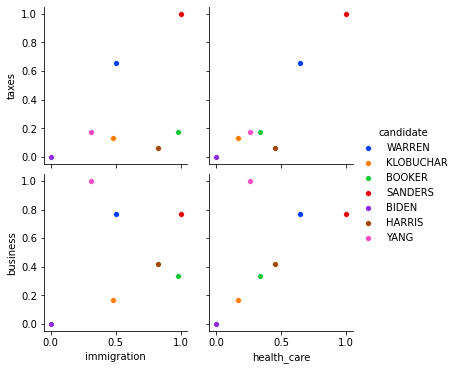

In [47]:
# Creates a dictionary of mse scaled calle sc_emb
def create_emb_mse_dict_1(mean_emb_dict, vector_of_interest):
    #Gets the MSE
    vect = model_[vector_of_interest]
    emb = {}
    for speaker in mean_emb_dict :
        word_sum = 0
        spkr_embds = mean_emb_dict[speaker]
        for i in range(300):
            word_sum += (vect[i]-spkr_embds[i])**2 #MSE

        emb[speaker] = word_sum

    #Scaled climate scores (highest score most closely aligns with climate)
    sc_emb = {}
    min_v = min(emb.values())
    max_v = max(emb.values()) 
    for speaker in emb:
        sc_emb[speaker] = 1-((emb[speaker]-min_v)/ (max_v - min_v))

    #Print scaled climate 1-MSE
    return sc_emb

# Run the function
sc_mse_1 = create_emb_mse_dict_1(mean_emb, word1)
sc_mse_2 = create_emb_mse_dict_1(mean_emb, word2)
sc_mse_3 = create_emb_mse_dict_1(mean_emb, word3)
sc_mse_4 = create_emb_mse_dict_1(mean_emb, word4)

#Create a dictionary of these vectors
inputs = []
can_inputs = {}
for candidate in sc_mse_1 :
    holder = []
    holder.append(sc_mse_1[candidate])
    holder.append(sc_mse_2[candidate])
    holder.append(sc_mse_3[candidate])
    holder.append(sc_mse_4[candidate])
    inputs.append(holder)
    can_inputs[candidate]=holder

# Create dataframe called dt 
new_df = pd.DataFrame.from_dict(can_inputs)
new_df = new_df.T
new_df = new_df.reset_index()
new_df['candidate'] = new_df['index']
new_df.pop('index')
new_df.columns = [word1, word2, word3, word4, 'candidate']
df = new_df

# Visualize the dataframe
import seaborn as sns
g = sns.pairplot(new_df, hue = 'candidate',
                 x_vars=[word1, word2],
                 y_vars=[word3, word4])

## K-means Clustering

Unsupervised machine learning algorithm

“the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.” - Towardsdatascience

In [38]:
# import clustering alo (nltk has one thats great)
import clustering_code #the k-means algo

# Function to print out the means in a pretty way
def pprint_means(the_means) :
    var_labels = [word1, word2, word3, word4]
    for idx, cluster_mean in enumerate(the_means) :
        print("--- Printing Cluster " + str(idx) + " ---")
        
        for idx2, item in enumerate(cluster_mean) :
            print(": ".join([var_labels[idx2],str(round(item,2))]))

        print("----------------------\n")

Clustering Code Loaded


4-means:
0 : BOOKER
0 : HARRIS
1 : YANG
2 : KLOBUCHAR
2 : BIDEN
3 : WARREN
3 : SANDERS


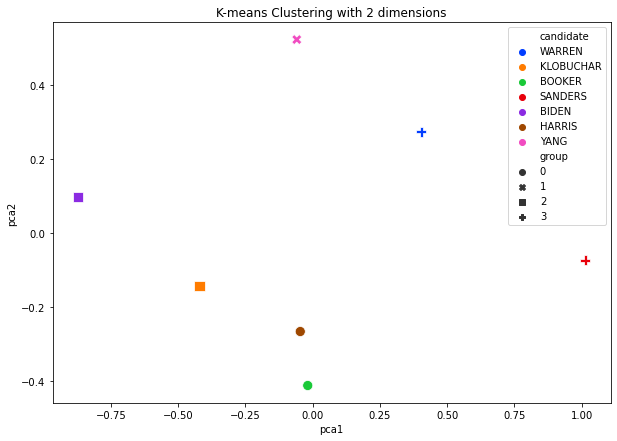

In [45]:
#Make a cute clustering dataframe called cluster_df
cluster_df = pd.DataFrame.from_dict(can_inputs)
cluster_df = cluster_df.T
cluster_df=cluster_df.reset_index()
cluster_df.columns = ['candidate', word1, word2, word3, word4]

k = 4 #Number of clusters 
assignments, means = clustering_code.train_dict(can_inputs, k)  # Takes in the dictionary and number of clusters

s_assign = ( (k ,assignments[k]) for k in sorted(assignments, key=assignments.get, reverse=False))
print( str(k) + "-means:")  # prints out the number of clusters '4-means'
for candidate, cluster in s_assign : # prints out the groups in order from 0 to 3
    print(str(cluster) + " : " + candidate)

#Store the groups in a dataframe called group_df and clean it up a bit
group_df=pd.DataFrame.from_dict(assignments,orient='index')
group_df=group_df.reset_index()
group_df.columns=['candidate','group']

# Merge group_df and cluster_df
cluster_df = cluster_df.merge(group_df)

#In order to visualize these groups in 2 dimensions we have to use PCA (principle component analysis)
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(cluster_df[[word1, word2, word3, word4]])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

#sns.color_palette("flag")
g1 = sns.set_palette("bright")
import matplotlib.pyplot as plt
plt.figure(figsize=[10,7])
# plt.markers

g1 = sns.scatterplot(x="pca1", y="pca2", hue=cluster_df['candidate'],style=cluster_df['group'], data=results,palette='bright',
                    legend = 'brief', s=102)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [43]:
pprint_means(means)

--- Printing Cluster 0 ---
immigration: 0.4
health_care: 0.45
taxes: 0.41
business: 0.88
----------------------

--- Printing Cluster 1 ---
immigration: 1.0
health_care: 1.0
taxes: 1.0
business: 0.77
----------------------

--- Printing Cluster 2 ---
immigration: 0.76
health_care: 0.32
taxes: 0.12
business: 0.31
----------------------

--- Printing Cluster 3 ---
immigration: 0.0
health_care: 0.0
taxes: 0.0
business: 0.0
----------------------



### Thanks for watching!